![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/alpsina, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [266]:
# Your code here!  Ahmet Şeref Okay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import  Pipeline
import seaborn as sns
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' #my kernel sometimes dies, this prevents it
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier 
from timeit import default_timer as timer
from datetime import timedelta
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,f1_score,accuracy_score,recall_score,precision_score


Reading and checking data

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

print(f"DataFrame:\n{df.head()}\n\nDataFrame has {df.shape[0]} data, {df.shape[1]-1} column \n\nTarget Column: {df.columns[4]}")

DataFrame:
   feature_1  feature_2  feature_3  feature_4  isVirus
0  -0.233467   0.308799   2.484015   1.732721    False
1   1.519003   1.238482   3.344450   0.783744    False
2   0.400640   1.916748   3.291096  -0.918519    False
3  -1.616474   0.209703   1.461544  -0.291837    False
4   1.480515   5.299829   2.640670   1.867559     True

DataFrame has 1999 data, 4 column 

Target Column: isVirus


In [3]:
df.isnull().sum()  #we have many missing values distributed kinda evenly at all features

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

#  Before Imputation and Regularization, Data Distribution

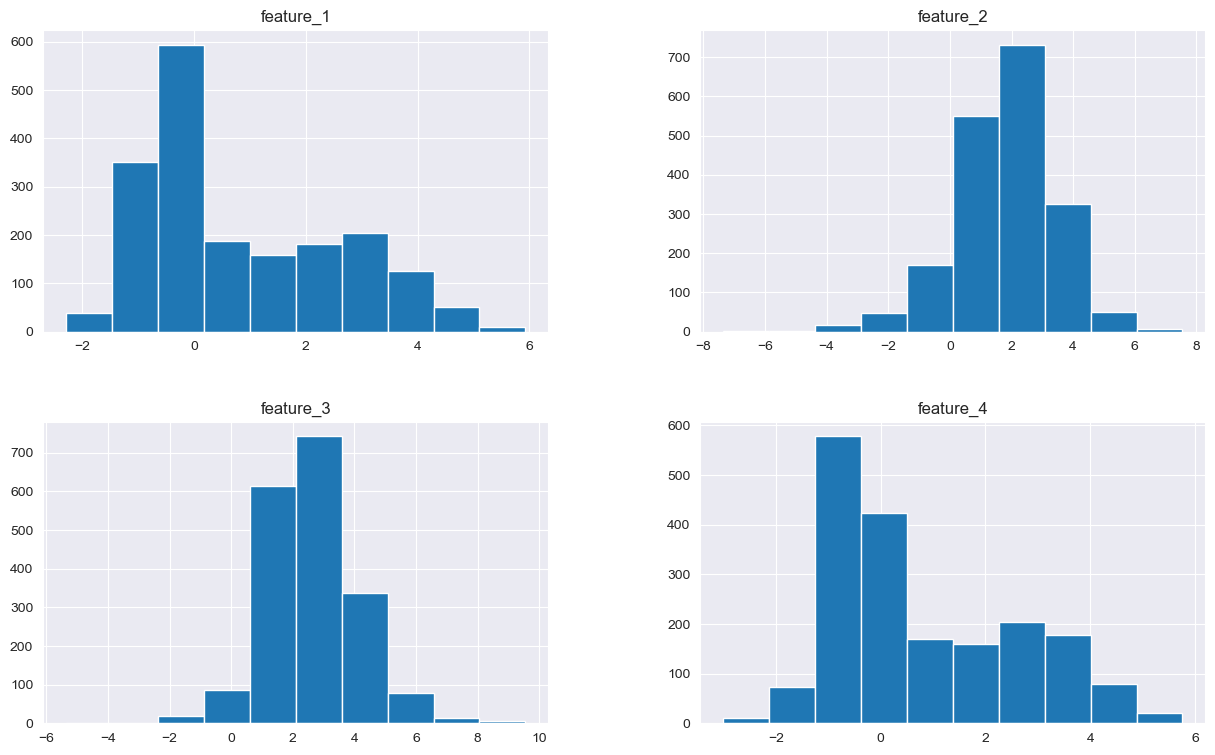

In [11]:
df.iloc[:,:4].hist(figsize=(15,9))
sns.set_style("darkgrid")

As you can see from above some features have accumulated at some certain places and values usually varies between (-2,6)<br>
using mean imputation maybe gives us a undesirable results

I am going to search with randomizedsearchcv and optuna but for showing what exactly regularization and imputing missing values to the data

# Standard Scaled and Imputed Data Distribution

In [8]:
dfexample=df.copy()

imputer_mean = SimpleImputer(strategy="mean")  #just created a basic pipeline for using imputation and regularization
pip1=Pipeline([("mean_imputer",imputer_mean),("standard_scaler",StandardScaler())
    
])
names=dfexample.columns[:4]  #we need to take names because pipeline above just tooks values
dataa=pip1.fit_transform(dfexample[dfexample.columns[:4]])

array([[<AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>],
       [<AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'feature_4'}>]], dtype=object)

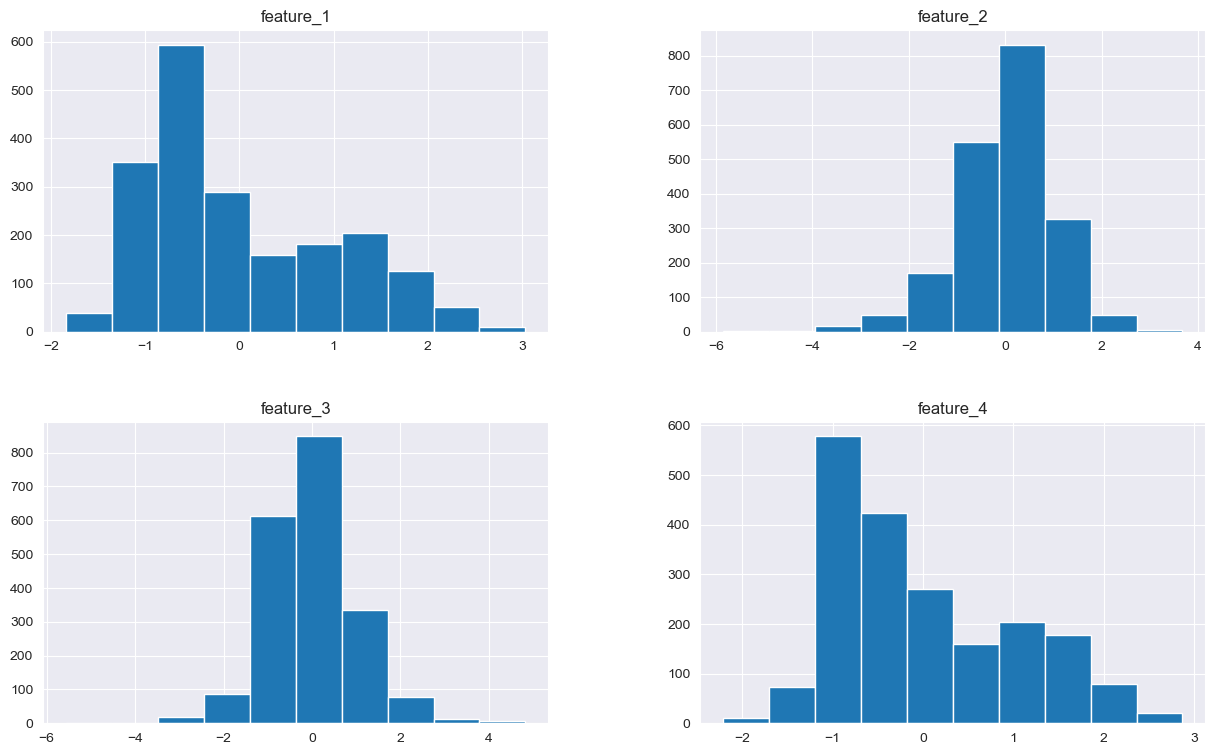

In [12]:
dfstandardscaled = pd.DataFrame(dataa,columns=names)
dfstandardscaled.hist(figsize=(15,9))

#  Minmax Scaled and Imputed Data Distribution

In [13]:
dfexample=df.copy()

imputer_mean = SimpleImputer(strategy="mean")
pip2=Pipeline([("mean_imputer",imputer_mean),("minmax_scaler",MinMaxScaler())
    
])
names=dfexample.columns[:4]
dataa2=pip2.fit_transform(dfexample[dfexample.columns[:4]])

After applying minmax scaler, all values became in the interval of [0,1]

array([[<AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>],
       [<AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'feature_4'}>]], dtype=object)

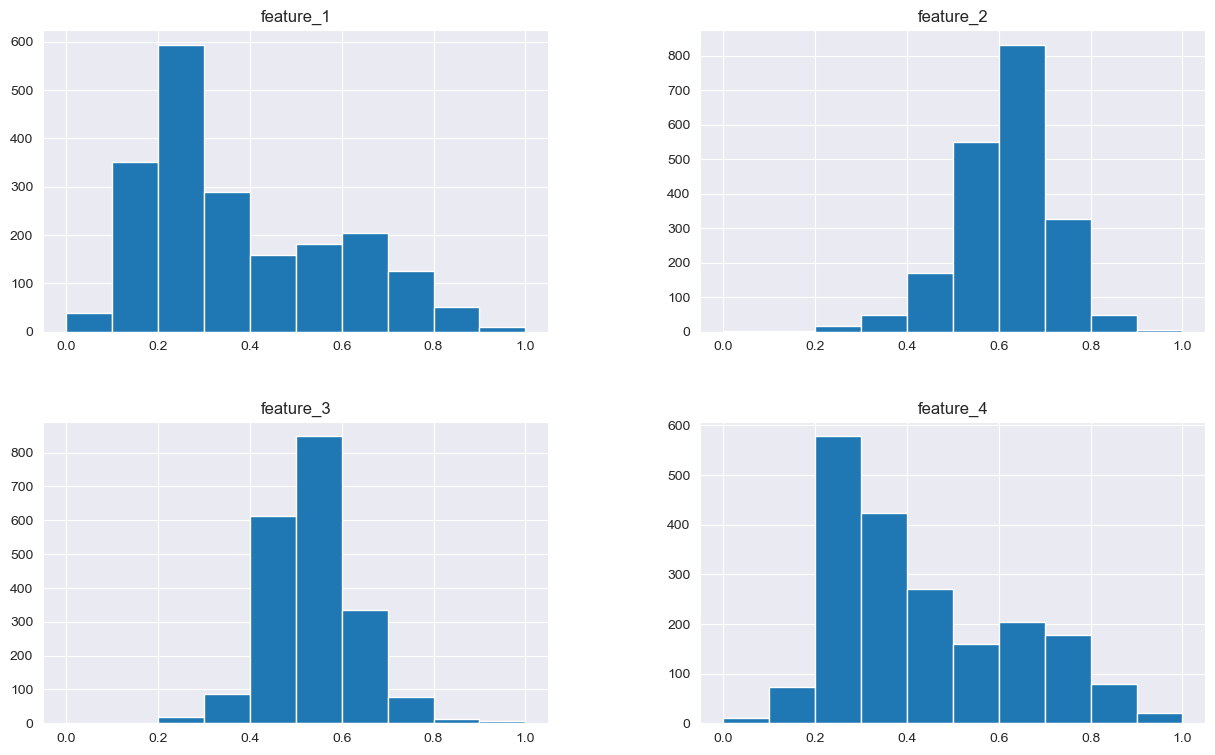

In [14]:
dfminmaxscaled = pd.DataFrame(dataa2,columns=names)
dfminmaxscaled.hist(figsize=(15,9))

In [15]:
dfstandardscaled.max()  #max values of every feature when applying std scaler

feature_1    3.036524
feature_2    3.677679
feature_3    4.828420
feature_4    2.874924
dtype: float64

In [16]:
dfminmaxscaled.max()  # max values of every feature when applying minmax scaler

feature_1    1.0
feature_2    1.0
feature_3    1.0
feature_4    1.0
dtype: float64

In [17]:
dfexample.iloc[:,:4].mean()  #when replacing missing values with their respected column's mean

feature_1    0.814404
feature_2    1.795843
feature_3    2.621096
feature_4    0.807499
dtype: float64

In [18]:
dfexample.iloc[:,:4].median()  #when replacing missing values with their respected column's median

feature_1    0.084789
feature_2    1.881904
feature_3    2.499623
feature_4    0.021857
dtype: float64

In [19]:
df[df.columns[-1]]=df[df.columns[-1]].replace({True:1,False:0})  #replacing true to 1 and false to zero with replace method and dict
df.head(3)

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,0
1,1.519003,1.238482,3.344450,0.783744,0
2,0.400640,1.916748,3.291096,-0.918519,0


0    1332
1     667
Name: isVirus, dtype: int64 
Ratio between values:1.9970014992503748 


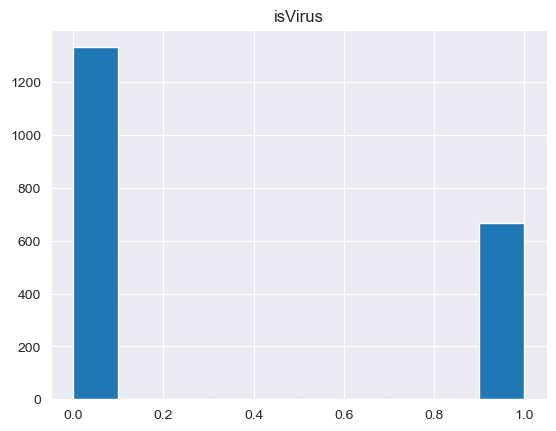

In [20]:
df.hist(column="isVirus")
print(df.isVirus.value_counts(),f"\nRatio between values:{df.isVirus.value_counts()[0]/df.isVirus.value_counts()[1]} ")

It is really a huge difference and we might ended up having a biased model towards False/0

#  Train Test Split

We need to evaluate our model, but with what? If we just use all of our data for training and then evaluate on them we might ended up <b>overfitting</b> our model. <br> for this reason we need to take some part of our data and store it in some place and not use them for training section of our model.

In [21]:
df2=df.copy()    #for not changin the original dataframe
X=df2.drop(columns="isVirus")
Y=df2["isVirus"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y) #for reproduceability used random state

print("Train dataset's 0-1: \n{}\n\nTest dataset's 0-1:\n{}".format(y_train.value_counts(),y_test.value_counts()))
x_train #i will handle missing value and regularization steps inside a single pipeline, this way data leakage going to be prevented
                

Train dataset's 0-1: 
0    932
1    467
Name: isVirus, dtype: int64

Test dataset's 0-1:
0    400
1    200
Name: isVirus, dtype: int64


,feature_1,feature_2,feature_3,feature_4
6,0.003583,-0.027756,3.048730,NaN
1937,2.237885,2.112220,3.936399,2.474359
1852,2.955860,4.618459,3.571110,2.456306
1331,-0.364562,2.377326,6.764124,-0.564389
167,1.312470,-1.006649,1.364352,-0.858972
...,...,...,...,...
1396,1.687150,4.414874,3.156476,2.783656
1486,NaN,4.041568,2.960732,2.051067
403,-0.417429,3.285732,1.298813,-0.453553
1801,5.188619,2.780227,3.900724,3.891364


#  Building Model(s), Randomized Search Hyper Parameter Opt.

### Important Points
**First** : I am using a timer for calculating how much time it takes to model train <br>
**Second** : I have a pipeline that has imputing,scaling and classification steps <br>
**Third** : Model below uses Randomized Search for both seeing which model and it's which hyper parameters gives us better result<br>
**Fourth**: model below uses stratified kfold for cross validation parts have similar ratio of 1-0 <br>
**Fifth** : Classification Models i have used;<b> KneighbourClassifier,RandomForestClassifier, XGBClassifier </b> <br>
**Sixth** : I have decided to use <b>f1</b> score as a metric due to accuracy not always works and our data's 0-1 ratio is not good <br>

### Pros and cons of using Randomized Search instead of hyperopt,optuna,gridsearch?

$\Rightarrow$ it is cheap in the case of time and computational complexity <br>

$\Rightarrow$ This does not guarantee(probably never) optimal solution but heuristically it gives a good answer <br>

$\Rightarrow$ This method gives us a good starting point when we want to get optimal hyperparameters, for example we can create another hyperparameter search model with starting where randomized search gives us <br>

$\Rightarrow$ Gridsearch is not even an option, it is basically greediest and most complex of them all.


### Classification models that i have used and their summarization

<ul>
    <li><b> KneighboursClassifier: </b></li> is a type of supervised learning algorithm where the input data is classified based on its similarity to the k-nearest data points in the training set, with the class of the majority of the k-nearest neighbors determining the classification of the input data. At model below i have looked for neighbour(k) values  <br> 
    <li><b> RandomforestClassifier: </b></li>  is a type of ensemble learning algorithm that combines multiple decision trees to make a classification decision. It randomly selects a subset of features and data points for each tree and aggregates their predictions to produce a final output. The result is a highly accurate and robust classifier that is less prone to overfitting and can handle large datasets with high dimensionality. Here i have looked for its number of decision trees and max depth of those trees <br>
    <li><b> XGBClassifier: </b></li>  is a type of gradient boosting algorithm that iteratively trains a sequence of weak decision tree models to improve the overall prediction accuracy. It uses a combination of regularization techniques to prevent overfitting and handles missing values in the data. The result is a powerful and efficient classifier that can handle large datasets and achieve state-of-the-art performance in various applications.<br> This is the classification model that is going to give us best result.
</ul>


In [22]:

start = timer()
pipefin = Pipeline([("Imputer",SimpleImputer(strategy='median')),("scaler",StandardScaler()),('classifier',RandomForestClassifier())])

kfoold=StratifiedKFold(n_splits=5,shuffle=False)


search_space = [
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors':np.arange(3,18,3)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': np.arange(30,300,30),
                 'classifier__max_depth': np.arange(2,15,3)},
                {'classifier': [XGBClassifier()],
                 'classifier__n_estimators': np.arange(150,2000,50), #number of boosting rounds/weak trees trained
                 'classifier__learning_rate': np.logspace(-6, -1,6),  # step size
                 "classifier__max_depth":np.arange(2,16,2), 
                 "classifier__min_child_weight":np.arange(1,15,1),
                # "classifier__reg_alpha":np.linspace(0,3,10), # lasso/l1 regularization that penalizes model's weights,
                 #i did not want to use this one because this has potential of eliminating a feature, we have only 4 feature.
                 "classifier__reg_lambda": np.linspace(1,3,10) #ridge/l2 regularization that penalizes model's weights
                 # this uses squared form, in this case model only tries to lessen them not eliminate them
                },{"Imputer__strategy":["median","mean"]}
    
               ]


clf = RandomizedSearchCV(pipefin, search_space,n_iter=80, cv=kfoold, verbose=20,scoring='f1',n_jobs = -1)
# Fit grid search
best_model = clf.fit(x_train.values, y_train.values)
# View best model
print(best_model.best_estimator_.get_params()['classifier'])
end = timer()
print(f"\nRunning Time:{timedelta(seconds=end-start)}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[02:41:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=12, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1.8888888888888888, scale_pos_weight=1,
              subsample=1, tree_method='exact', 

In [23]:
print(f"Imputer strategy: {best_model.best_estimator_.get_params()['Imputer']}\nbest score cv:{best_model.best_score_}")
yptest=best_model.predict(x_test.values)


Imputer strategy: SimpleImputer(strategy='median')
best score cv:0.8062948302959146


## Evaluation and Confusion Matrix

#### Confusion Matrix
Confusion matrix is a table that summarizes the performance of a classification model by comparing its predicted labels with the actual labels of the test data. It shows the number of true positive, true negative, false positive, and false negative predictions for each class, which can be used to calculate various evaluation metrics such as accuracy, precision, recall, and F1-score. <br>
#### Evaluation Metrics
<ul>
    <il>Accuracy: (TP + TN) / (TP + TN + FP + FN) </il> <br>
    <il>Precision: TP / (TP + FP) </il> <br>
    <il>Recall (also known as sensitivity or true positive rate): TP / (TP + FN) </il> <br>
    <il>F1-score: 2 * (precision * recall) / (precision + recall) </il> <br>
    
</ul>

F1 Score: 0.826530612244898 
Accuracy: 0.8866666666666667


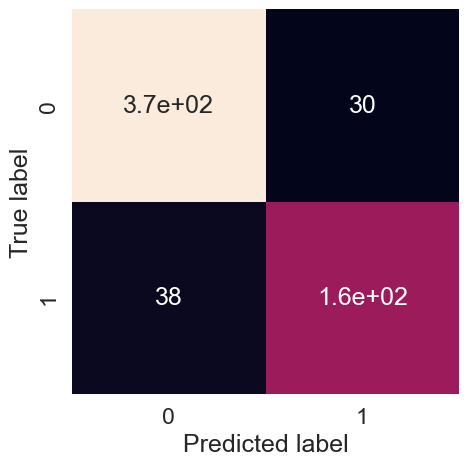

In [25]:
matrix1=confusion_matrix(y_test,yptest)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(matrix1,
                     annot=True,
                     cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print("F1 Score: {} \nAccuracy: {}".format(f1_score(y_test,yptest),(y_test==yptest).sum()/yptest.size))

### Conclusion

Model's performance is good(f1 is higher than 0.80) but not perfect,there may be some ways to improve this problem <br>
At first we need to check our source of data, there are more than 400 value is missing and 1-0 ratio is not good. <br>
Secondly we can continue optimizing hyperparameters(by optuna for example), but this second way wil have always limits.